创建演示数据：

In [1]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 2, n_informative = 2, n_redundant = 0, n_samples = 1000, n_classes = 2, random_state = 0)

演示数据：

<IPython.core.display.Javascript object>


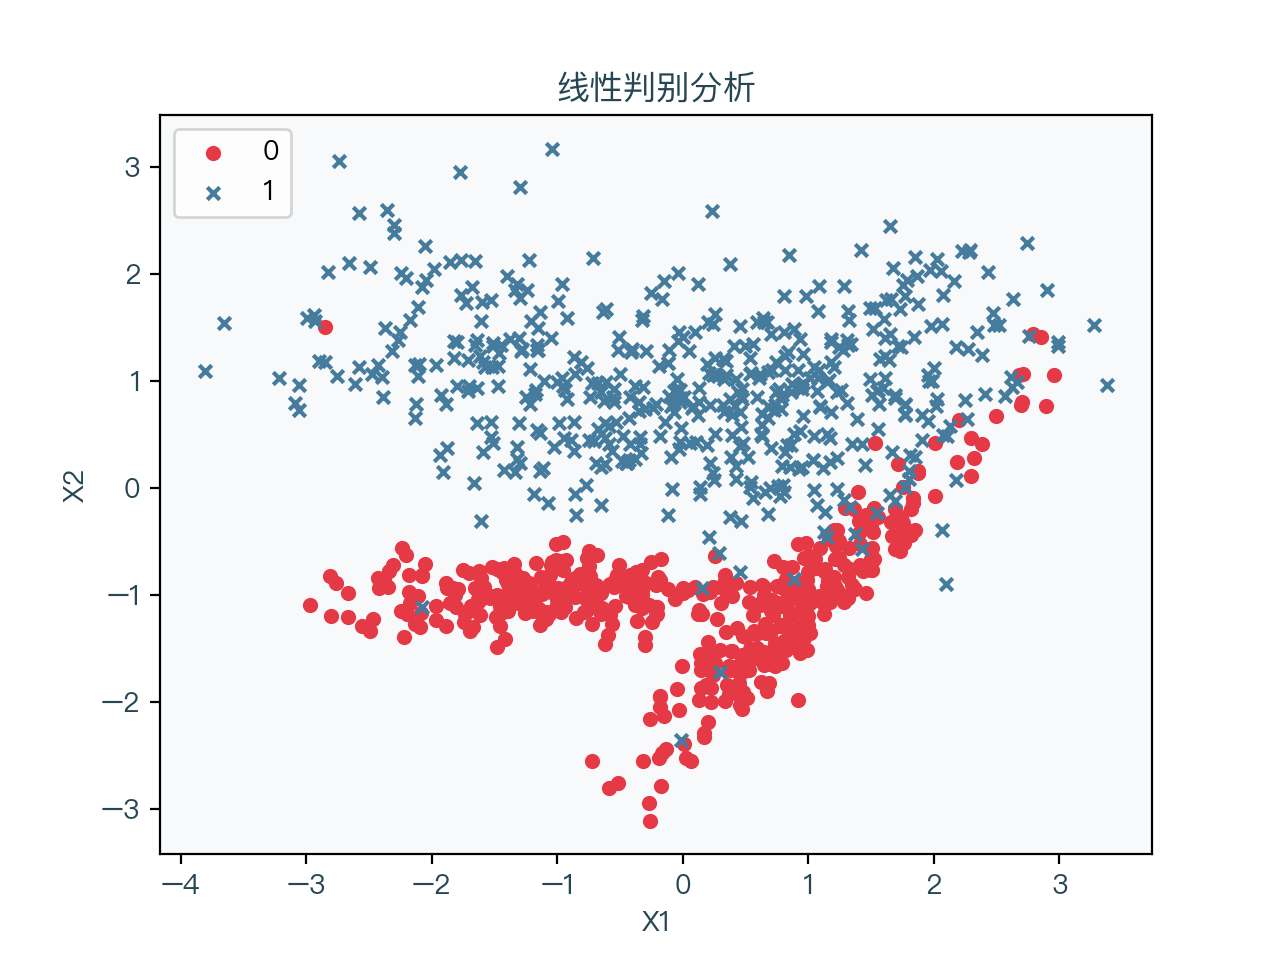

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x1 = X[y==0][:, 0]
y1 = X[y==0][:, 1]
x2 = X[y==1][:, 0]
y2 = X[y==1][:, 1]
p1 = plt.scatter(x1, y1, c='#e63946', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='#457b9d', marker='x', s=20)

ax.set_title('线性判别分析', color='#264653')
ax.set_xlabel('X1', color='#264653')
ax.set_ylabel('X2', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend([p1, p2], ["0", "1"], loc="upper left")
plt.show()

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 初始化线性判别分析器
lda = LinearDiscriminantAnalysis()
# 拟合线性模型
lda.fit(X, y)
# 权重系数
W = lda.coef_
# 截距
b = lda.intercept_
print("b", b, "W", W)

b [0.16750908] W [[-0.05821978  4.73189178]]


<IPython.core.display.Javascript object>


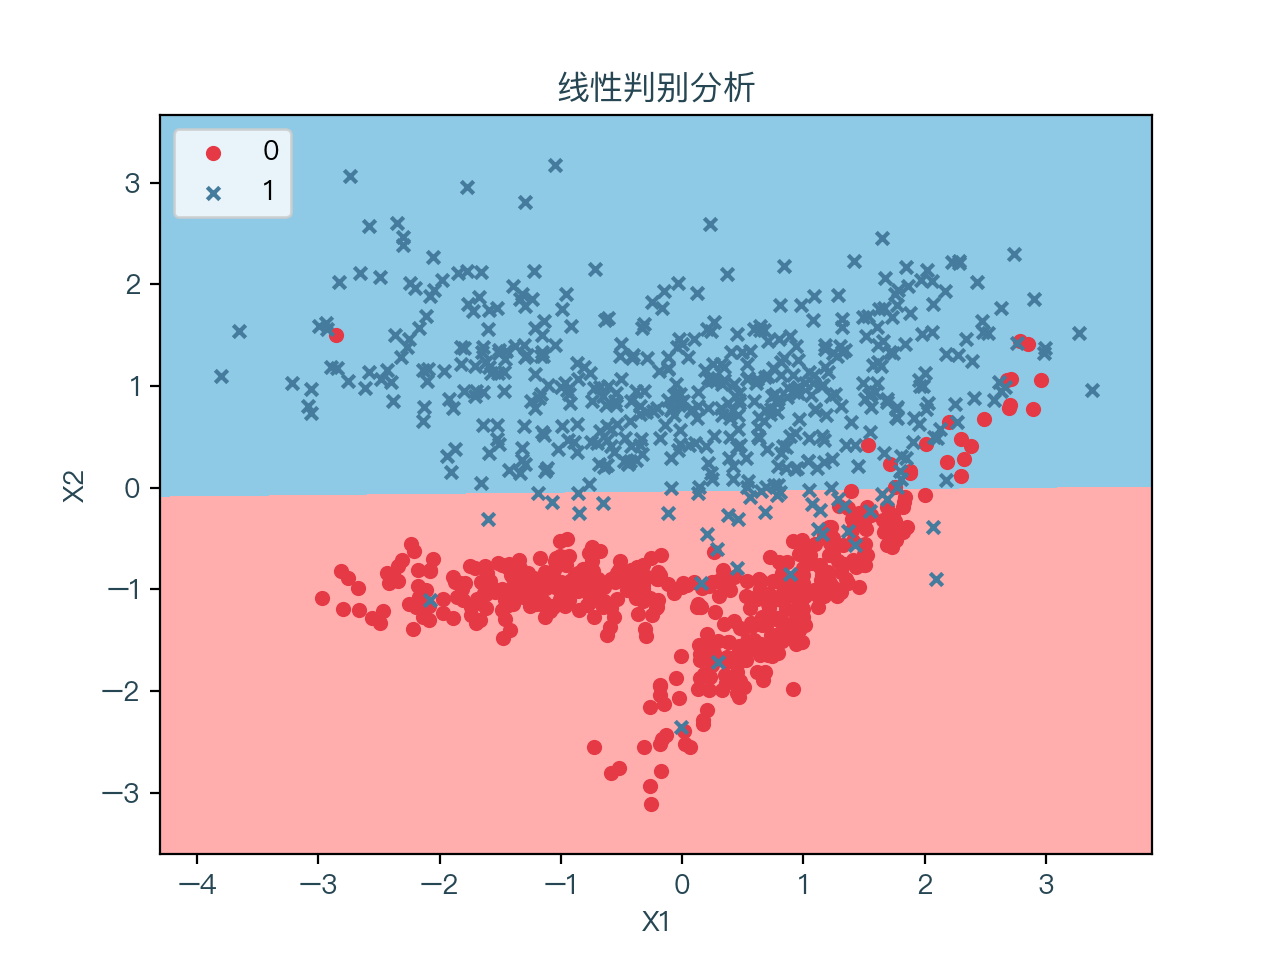

/Users/saisimon/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
clist=['#ffadad', '#8ecae6']
newcmp = LinearSegmentedColormap.from_list('point_color', clist)
plt.pcolormesh(xx, yy, Z, cmap = newcmp)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

x1 = X[y==0][:, 0]
y1 = X[y==0][:, 1]
x2 = X[y==1][:, 0]
y2 = X[y==1][:, 1]
p1 = plt.scatter(x1, y1, c='#e63946', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='#457b9d', marker='x', s=20)

ax.set_title('线性判别分析', color='#264653')
ax.set_xlabel('X1', color='#264653')
ax.set_ylabel('X2', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend([p1, p2], ["0", "1"], loc="upper left")
plt.show()

线性判别分析（LDA）：

In [5]:
def lda(X, y):
    """
    线性判别分析（LDA）
    args:
        X - 训练数据集
        y - 目标标签值
    return:
        W - 权重系数
    """
    # 标签值
    y_classes = np.unique(y)
    # 第一类
    c1 = X[y==y_classes[0]][:]
    # 第二类
    c2 = X[y==y_classes[1]][:]
    # 第一类均值向量
    mu1 = np.mean(c1, axis=0)
    # 第二类均值向量
    mu2 = np.mean(c2, axis=0)
    sigma1 = c1 - mu1
    # 第一类协方差矩阵
    sigma1 = sigma1.T.dot(sigma1) / c1.shape[0]
    sigma2 = c2 - mu2
    # 第二类协方差矩阵
    sigma2 = sigma2.T.dot(sigma2) / c2.shape[0]
    # 求权重系数
    return np.linalg.pinv(sigma1 + sigma2).dot(mu2 - mu1), mu1, mu2

def discriminant(X, w, mu1, mu2):
    """
    判别新样本点
    args:
        X - 训练数据集
        w - 权重系数
        mu1 - 第一类均值向量
        mu2 - 第二类均值向量
    return:
        分类结果
    """
    a = np.abs(X.dot(w) - mu1.dot(w))
    b = np.abs(X.dot(w) - mu2.dot(w))
    return np.argmin(np.array([a, b]), axis=0)

拟合演示数据：

In [6]:
W, mu1, mu2 = lda(X, y)
print("W", W)
r1 = discriminant(X[0], W, mu1, mu2)
print(r1)

W [-0.03051732  2.37339291]
0


概率角度下的线性判别分析：

In [7]:
def ldaBayes(X, y):
    """
    线性判别分析（LDA）
    args:
        X - 训练数据集
        y - 目标标签值
    return:
        W - 权重系数
        b - 偏移量
    """
    # 标签值
    y_classes = np.unique(y)
    # 第一类
    c1 = X[y==y_classes[0]][:]
    # 第二类
    c2 = X[y==y_classes[1]][:]
    # 第一类均值向量
    mu1 = np.mean(c1, axis=0)
    # 第二类均值向量
    mu2 = np.mean(c2, axis=0)
    # 第一类协方差矩阵
    sigma1 = c1 - mu1
    sigma1 = sigma1.T.dot(sigma1)
    # 第二类协方差矩阵
    sigma2 = c2 - mu2
    sigma2 = sigma2.T.dot(sigma2)
    # Σ 矩阵
    sigma = (sigma1 + sigma2) / (X.shape[0] - len(y_classes))
    # Σ 逆矩阵
    sigman = np.linalg.pinv(sigma)
    # 求权重系数
    w = sigman.dot(mu2 - mu1)
    b = -0.5 *(mu2.reshape(-1, 1).T.dot(sigman).dot(mu2) - mu1.reshape(-1, 1).T.dot(sigman).dot(mu1)) + np.log(len(c2) / len(c1))
    return w, b

def discriminantBayes(X, w, b):
    """
    判别新样本点
    args:
        X - 训练数据集
        w - 权重系数
        b - 偏移量
    return:
        分类结果
    """
    r = X.dot(w) + b
    r[r > 0] = 1
    r[r <= 0] = 0
    return r

拟合演示数据：

In [8]:
W_bayes, b_bayes = ldaBayes(X, y)
print("b", b_bayes, "W", W_bayes)
r2 = discriminantBayes(X[0], W, b)
print(r2)

b [0.16750908] W [-0.05821978  4.73189178]
[0.]


不同角度下的线性判别分析的关联：

In [9]:
print(2 * W)
print(W_bayes)

[-0.06103463  4.74678582]
[-0.05821978  4.73189178]
